# 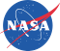 **NASA FIRMS - Data Ingest and Manipulation in Python**


This tutorial will show how to ingest and manipulate sample FIRMS fire detection dataset. We will cover:

- ingest
- subsetting
- converting date and time fields into datetime and applying timezone

**Programming language:** Python

**Libraries:**  [pandas](https://pandas.pydata.org)

---

**LEVEL:** Beginner

---


**Remember to execute code in order**

In this module, we will download a sample VIIRS SNPP dataset (~6MB) from **July 12th 2023** with time range from **0:00 to 19:50** (7:50pm) **GMT**. Our sample dataset includes both NRT and URT data.

To better understand URT, RT and NRT visit:

[Wildfire detection in the US and Canada within a minute of satellite observation](https://wiki.earthdata.nasa.gov/pages/viewpage.action?pageId=258343755)

[Are there particular differences between URT data, RT data and NRT data?](https://www.earthdata.nasa.gov/faq/firms-faq#ed-urt-rt-nrt-differences)


---

## Data Ingest

---

In [1]:
# import libraries for data manipulation

import pandas as pd

# Let's read VIIRS csv sample data set into a DataFrame df

df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# show how many rows (records) and columns (values per record) we have

print ('FIRMS sample fire data contains %i rows and %i columns' % (df.shape[0], df.shape[1]))
df.shape

FIRMS sample fire data contains 74605 rows and 14 columns


(74605, 14)

In [2]:
# Display information about our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74605 entries, 0 to 74604
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    74605 non-null  float64
 1   longitude   74605 non-null  float64
 2   bright_ti4  74605 non-null  float64
 3   scan        74605 non-null  float64
 4   track       74605 non-null  float64
 5   acq_date    74605 non-null  object 
 6   acq_time    74605 non-null  int64  
 7   satellite   74605 non-null  object 
 8   instrument  74605 non-null  object 
 9   confidence  74605 non-null  object 
 10  version     74605 non-null  object 
 11  bright_ti5  74605 non-null  float64
 12  frp         74605 non-null  float64
 13  daynight    74605 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 8.0+ MB


The data shows as there are **74605** records, with 7 variables containing decimal point (**float64**) values, one (acq_time) numeric variable (**int64**), and remainder as string values (**object**)

For information about these values, visit: [https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data)

In [3]:
# Now, display the first 5 records from our dataset

df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N


In [4]:
# show the last 5 records from our dataset

df.tail()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
74600,61.42408,-110.40578,350.48,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,309.39,16.01,D
74601,61.42510,-110.39867,336.03,0.4,0.4,2023-07-12,1950,N,VIIRS,l,2.0URT,308.08,32.98,D
74602,61.42733,-110.40780,328.53,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,298.15,16.01,D
74603,61.42834,-110.40069,338.45,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,302.81,32.98,D
74604,61.42936,-110.39356,339.52,0.4,0.4,2023-07-12,1950,N,VIIRS,n,2.0URT,306.58,32.98,D


In [5]:
# check for unique version values

print ('Checking for unique version values:')
df['version'].unique()

Checking for unique version values:


array(['2.0NRT', '2.0URT'], dtype=object)

In [6]:
# now let's also see how many records are with one version vs another

print ('Version 2.0NRT has %i records and version 2.0URT has %i records' % (len(df[df['version']=='2.0NRT']), len(df[df['version']=='2.0URT'])))

Version 2.0NRT has 69507 records and version 2.0URT has 5098 records



Notice, how '**version**' column contains different values for *df.head()* and *df.tail()*. This can also be checked as: *df['version'].unique()*.

Aside for version difference, all the other values are populated and maintained in the same format. There may be a small difference in detections between these versions as they use slightly different algorithms, but overall, these detections are consistent.

To better understand differences in **version** and how it is generated, visit:

[Wildfire detection in the US and Canada within a minute of satellite observation](https://wiki.earthdata.nasa.gov/pages/viewpage.action?pageId=258343755)

[Are there particular differences between URT data, RT data and NRT data?](https://www.earthdata.nasa.gov/faq/firms-faq#ed-urt-rt-nrt-differences)

---

## Subsetting

---


Our sample dataset contains entire world. Let's say we want to quickly look at Canada. For simplicity, we don't use more complex polygons defining the country shape, but rather more "crude" bounding box. To provide datasets relevant to specific regions, our system pre-generates them for various parts of the world: [Regional Coordinates](https://firms.modaps.eosdis.nasa.gov/active_fire/coordinates.html)

In [7]:
import pandas as pd
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# From 'Regional Coordinates' we can get Canada's approximate bounding box
# Canada coordinates: West South, East North as -150 40, -49 79

# copy() - will create a duplicate dataset with Canada data only
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()
print ('Canada subset contains %i records.' % len(df_canada))

Canada subset contains 14045 records.


In [8]:
# Let's also create another one for Australia and New Zealand for our later example
# Australia and New Zealand coordinates: West South, East North as 110 -55, 180 -10

# alternatively, we can assign extent values into an array
extent = [110, -55, 180, -10]
df_aus_nz = df[(df['longitude'] >= extent[0]) & (df['latitude'] >= extent[1]) & (df['longitude'] <= extent[2]) & (df['latitude'] <= extent[3])].copy()
print ('Australia and New Zealand subset contains %i records.' % len(df_aus_nz))

Australia and New Zealand subset contains 2999 records.


We can further play with subsetting, for example, we can look at values that have confidence '**normal**' or '**high**', have fire radiative power (**frp**) equal or higher than 5 and include only daytime detection as daynight='**D**'.


Our day time query condition is: **(confidence='n' or confidence='h') and frp >=5 and daynight='D'**

For night time query the condition is: **(confidence='n' or confidence='h') and frp >=5 and daynight='N'**


**Note**: other datasets (MODIS, Landsat, ...) may include confidence as integer between 0..100

In [9]:
# Let's subset our data to values with confidence normal 'n' and high 'h'
# and fire radiative power (frp) higher or equal to 5

df_custom_day = df[((df['confidence'] == 'n') | (df['confidence'] == 'h')) & (df['frp'] >= 5) & (df['daynight'] == 'D')]
print ('Day time detection with normal and high confidence and frp > 5 contains %i records' %  len(df_custom_day))

# the same as above but with night detections

df_custom_night = df[((df['confidence'] == 'n') | (df['confidence'] == 'h')) & (df['frp'] >= 5) & (df['daynight'] == 'N')]
print ('Night time detections with normal and high confidence and frp > 5 contains %i records' %  len(df_custom_night))


Day time detection with normal and high confidence and frp > 5 contains 35504 records
Night time detections with normal and high confidence and frp > 5 contains 2683 records


---

## Datetime Conversion and Timezones

---

We have generated two fire detection sets (Canada, Australia and New Zealand). Now, let's look at converting date/time to their specific timezone as this information is easier to understand than GMT.

Canada timezones: [https://nrc.canada.ca](https://nrc.canada.ca/en/certifications-evaluations-standards/canadas-official-time/time-zones-daylight-saving-time)

USA timezones: [https://www.time.gov](https://www.time.gov)

---

The GMT or "Greenwich Mean Time" refers to the time zone at the zero degree of longitude that runs through the London suburb of Greenwich, from which it takes its name. It is also called the zero meridian.

---



We will create a new column called '**acq_datetime**' which will convert **acq_date** and **acq_time** into datetime object.

To do that we will use **pd.to_datetime** pandas function that converts numbers or strings into datetime object: [pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

---

Our conversion for Canada dataset:

**pd.to_datetime**(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')

---

**acq_date** column hold date information as a string in format 'YYYY-MM-DD' ex: 2023-07-12 which is July 12 2023

**acq_time** columns is integer between 0..2359; ex: 410 means 04:10

---
Since acq_time is a number, we want to convert it into string with leading zeros, so 410 becomes 0410. To do that:
- convert acq_time from integer to string -> **astype(str)**
- pad the string with up to 4 leading zeros (if applicable) using [pandas.zfill](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.zfill.html), so 410 becomes '0410' or 1 becomes 0001

---

Now the converted string can be used in **pd.to_datetime** function using date-time format matching our data: **format='%Y-%m-%d %H%M'**



In [10]:
# reload just in case steps were missed
import pandas as pd
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()
df_aus_nz = df[(df['longitude'] >= 110) & (df['latitude'] >= -55) & (df['longitude'] <= 180) & (df['latitude'] <=-10)].copy()


# let's create datetime column in our dataset combining acq_date and acq_time

df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')

# view random 5 records to confirm our conversion.
# note: seconds are set to 0; as our dataset doesn't provide information about seconds

print ('Canada sample datetime info:')
df_canada['acq_datetime'].sample(5)


Canada sample datetime info:


18342   2023-07-12 06:37:00
21317   2023-07-12 09:56:00
17891   2023-07-12 06:35:00
72067   2023-07-12 19:49:00
39640   2023-07-12 11:40:00
Name: acq_datetime, dtype: datetime64[ns]

In [11]:
# Now let's see the minimum and maximum datetime range available for Canada

print ('Canada datetime value range: %s to %s' % (str(df_canada['acq_datetime'].min()), str(df_canada['acq_datetime'].max())))

Canada datetime value range: 2023-07-12 04:53:00 to 2023-07-12 19:50:00


**Note**: seconds are set to 0 as our dataset doesn't provide information about seconds

---

Let's see what timezones are available for Canada:


In [12]:
# import timezone library
import pytz

print('Canada TimeZones')
for timeZone in pytz.country_timezones['CA']:
    print(timeZone)

Canada TimeZones
America/St_Johns
America/Halifax
America/Glace_Bay
America/Moncton
America/Goose_Bay
America/Blanc-Sablon
America/Toronto
America/Iqaluit
America/Atikokan
America/Winnipeg
America/Resolute
America/Rankin_Inlet
America/Regina
America/Swift_Current
America/Edmonton
America/Cambridge_Bay
America/Inuvik
America/Creston
America/Dawson_Creek
America/Fort_Nelson
America/Whitehorse
America/Dawson
America/Vancouver


In [13]:
# Let's compare our minimum and maximum date-time range converted using 3 different Canada time zones.
# We will use:
# Original GMT
# St_Johns (GMT-2:30)
# Toronto (GMT-4:00)
# Vancouver (GMT-7:00)

print ('Canada GMT timezone datetime value range: %s to %s' % (str(df_canada['acq_datetime'].min()), str(df_canada['acq_datetime'].max())))
print ('Canada St Johns timezone datetime value range: %s to %s' % (str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/St_Johns').min()), str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/St_Johns').max())))
print ('Canada Toronto timezone datetime value range: %s to %s' % (str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Toronto').min()), str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Toronto').max())))
print ('Canada Vancouver timezone datetime value range: %s to %s' % (str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Vancouver').min()), str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Vancouver').max())))

Canada GMT timezone datetime value range: 2023-07-12 04:53:00 to 2023-07-12 19:50:00
Canada St Johns timezone datetime value range: 2023-07-12 02:23:00-02:30 to 2023-07-12 17:20:00-02:30
Canada Toronto timezone datetime value range: 2023-07-12 00:53:00-04:00 to 2023-07-12 15:50:00-04:00
Canada Vancouver timezone datetime value range: 2023-07-11 21:53:00-07:00 to 2023-07-12 12:50:00-07:00


**Note**: Vancouver start date is **2023-07-11** and St. Johns, New Foundland is shifted 2.5 hours

---

Now let's check Australia and New Zealand

In [14]:
extent = [110, -55, 180, -10]
df_aus_nz = df[(df['longitude'] >= extent[0]) & (df['latitude'] >= extent[1]) & (df['longitude'] <= extent[2]) & (df['latitude'] <= extent[3])].copy()

# Now repeat for Australia and New Zealand

df_aus_nz['acq_datetime'] = pd.to_datetime(df_aus_nz['acq_date'] + ' ' + df_aus_nz['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')

print ('Australia and New Zealand sample datetime info:')
df_aus_nz['acq_datetime'].sample(5)

Australia and New Zealand sample datetime info:


11579   2023-07-12 04:17:00
10280   2023-07-12 04:10:00
12250   2023-07-12 04:17:00
10368   2023-07-12 04:14:00
10790   2023-07-12 04:17:00
Name: acq_datetime, dtype: datetime64[ns]

In [15]:
# View Australia and New Zealand timezones

print('Australia TimeZones')
for timeZone in pytz.country_timezones['AU']:
    print(timeZone)
print('New Zealand TimeZones')
for timeZone in pytz.country_timezones['NZ']:
    print(timeZone)

Australia TimeZones
Australia/Lord_Howe
Antarctica/Macquarie
Australia/Hobart
Australia/Melbourne
Australia/Sydney
Australia/Broken_Hill
Australia/Brisbane
Australia/Lindeman
Australia/Adelaide
Australia/Darwin
Australia/Perth
Australia/Eucla
New Zealand TimeZones
Pacific/Auckland
Pacific/Chatham


In [16]:
# Finally compare GMT with Australia and New Zealand

print ('Australia and New Zealand GMT timezone datetime value range: %s to %s' % (str(df_aus_nz['acq_datetime'].min()), str(df_aus_nz['acq_datetime'].max())))
print ('Australia Sydney timezone datetime value range: %s to %s' % (str(df_aus_nz['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Australia/Sydney').min()), str(df_aus_nz['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Australia/Sydney').max())))
print ('Australia Sydney timezone datetime value range: %s to %s' % (str(df_aus_nz['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Pacific/Auckland').min()), str(df_aus_nz['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Pacific/Auckland').max())))

Australia and New Zealand GMT timezone datetime value range: 2023-07-12 02:26:00 to 2023-07-12 15:31:00
Australia Sydney timezone datetime value range: 2023-07-12 12:26:00+10:00 to 2023-07-13 01:31:00+10:00
Australia Sydney timezone datetime value range: 2023-07-12 14:26:00+12:00 to 2023-07-13 03:31:00+12:00


**Note**: both timezones have maximum datetime range extending into **2023-07-13**

---

For the United States, the full list of time zones

In [17]:
for timeZone in pytz.country_timezones['US']:
    print(timeZone)

America/New_York
America/Detroit
America/Kentucky/Louisville
America/Kentucky/Monticello
America/Indiana/Indianapolis
America/Indiana/Vincennes
America/Indiana/Winamac
America/Indiana/Marengo
America/Indiana/Petersburg
America/Indiana/Vevay
America/Chicago
America/Indiana/Tell_City
America/Indiana/Knox
America/Menominee
America/North_Dakota/Center
America/North_Dakota/New_Salem
America/North_Dakota/Beulah
America/Denver
America/Boise
America/Phoenix
America/Los_Angeles
America/Anchorage
America/Juneau
America/Sitka
America/Metlakatla
America/Yakutat
America/Nome
America/Adak
Pacific/Honolulu


---

## Summary

---

Thank you for taking time to go over the tutorial. We hope you enjoyed it and if you have any questions or comments please use the 'Feedback' form at the top of our site [firms.modaps.eosdis.nasa.gov](https://firms.modaps.eosdis.nasa.gov)

In [18]:
# Summarizing the tutorial:

import pandas as pd
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create Canada subset
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

print ('Canada subset contains %i records.' % df_canada.count()[0])

# create datetime column
df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')

print ('Canada/Toronto timezone datetime value range: %s to %s \n\n' % (str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Toronto').min()), str(df_canada['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('America/Toronto').max())))

df_canada.sample(5)



Canada subset contains 14045 records.
Canada/Toronto timezone datetime value range: 2023-07-12 00:53:00-04:00 to 2023-07-12 15:50:00-04:00 




,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,acq_datetime
38452,52.53494,-124.69308,350.64,0.42,0.61,2023-07-12,1140,N,VIIRS,n,2.0NRT,283.51,5.57,N,2023-07-12 11:40:00
38360,61.97100,-134.60268,323.33,0.39,0.36,2023-07-12,1138,N,VIIRS,n,2.0NRT,276.69,3.18,N,2023-07-12 11:38:00
39807,54.22198,-125.59268,316.18,0.34,0.56,2023-07-12,1140,N,VIIRS,n,2.0NRT,283.73,2.23,N,2023-07-12 11:40:00
71062,54.15827,-108.28172,345.01,0.40,0.40,2023-07-12,1948,N,VIIRS,n,2.0URT,300.65,4.71,D,2023-07-12 19:48:00
22991,59.46338,-114.22133,331.86,0.39,0.36,2023-07-12,958,N,VIIRS,n,2.0NRT,286.50,4.68,N,2023-07-12 09:58:00


---
## Exercise
---

Using the information from this module, see if you can answer following questions:

- Using [Regional Coordinates](https://firms.modaps.eosdis.nasa.gov/active_fire/coordinates.html), how many fire detections are there for USA (Conterminous) and Hawaii?
- Applying 'Pacific/Honolulu' timezone, what is the minimum and maximum date range of USA (Conterminous) and Hawaii fire detections?
- How many USA (Conterminous) and Hawaii records are ultra real time? (*Hint: use 'version' column and set it to '2.0URT'*)

In [20]:
import pandas as pd

df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')


In [19]:
# Question 1: using Regional Coordinates, how many fire detections are there for USA (Conterminous) and Hawaii?

extent = [-160.5, 17.5, -63.8, 50] # get USA (Conterminous) and Hawaii extent
df_usa = df[(df['longitude'] >= extent[0]) & (df['latitude'] >= extent[1]) & (df['longitude'] <= extent[2]) & (df['latitude'] <= extent[3])].copy()

total_fires = len(df_usa) # provide count of records for df_usa

print ('Answer 1: There are %i detections for USA (Conterminous) and Hawaii' % total_fires)


Answer 1: There are 900 detections for USA (Conterminous) and Hawaii


In [ ]:
# Question 2: applying 'Pacific/Honolulu' timezone, what is the minimum and maximum date range of USA (Conterminous) and Hawaii fire detections?

df_usa['acq_datetime'] = ? # set this value
min_date = ? # get minimum acq_datetime from df_usa, applying 'Pacific/Honolulu' time zone
max_date = ? # get maximum acq_datetime from df_usa, applying 'Pacific/Honolulu' time zone

print ('Answer 2: For USA (Conterminous) and Hawaii, using Honolulu timezone, minimum date is %s and maximum date is %s' % (str(min_date), str(max_date)) )

In [ ]:
# Question 3: How many USA (Conterminous) and Hawaii records are ultra real time? (Hint: use 'version' column and set it to '2.0URT')

urt_records = len(df_usa[?]) # set the query
print ('There are %i ultra real time records.' % urt_records)

---
**Answers**

1: 900

2: minimum date = 2023-07-11 20:37:00-10:00 and maximum date = 2023-07-12 09:46:00-10:00

3: 324

---

## Solution

---

In [19]:
import pandas as pd
import pytz

df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')
extent = [-160.5,17.5, -63.8,50] # get USA (Conterminous) and Hawaii extent
df_usa = df[(df['longitude'] >= extent[0]) & (df['latitude'] >= extent[1]) & (df['longitude'] <= extent[2]) & (df['latitude'] <= extent[3])].copy()

total_fires = len(df_usa) # provide count of records for df_usa

print ('Answer 1: There are %i detections for USA (Conterminous) and Hawaii' % total_fires)

df_usa['acq_datetime'] = pd.to_datetime(df_usa['acq_date'] + ' ' + df_usa['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
min_date = df_usa['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Pacific/Honolulu').min()
max_date = df_usa['acq_datetime'].dt.tz_localize('GMT').dt.tz_convert('Pacific/Honolulu').max()

print ('Answer 2: For USA (Conterminous) and Hawaii, using Honolulu timezone, minimum date is %s and maximum date is %s' % (str(min_date), str(max_date)) )

urt_records = len(df_usa[df_usa['version'] == '2.0URT'])
print ('There are %i ultra real time records.' % urt_records)

Answer 1: There are 900 detections for USA (Conterminous) and Hawaii
Answer 2: For USA (Conterminous) and Hawaii, using Honolulu timezone, minimum date is 2023-07-11 20:37:00-10:00 and maximum date is 2023-07-12 09:46:00-10:00
There are 324 ultra real time records.


---

## Errors

---

If your execution fails, make sure you execute all of the code above the failed section.